# Dataset1

#1 Worked Example 
#**Problem:  Predicting the direction of the stock price movement (up or down) based on a combination of historical stock prices and sentiment analysis of Netflix, using logistic regression?**


Input and Output Format

Inputs:
Historical stock prices of Netflix for the past 'N' days. The data includes Open, High, Low, Close, and Volume for each day.

Outputs:
A binary indicator for each day in the prediction set, where '1' indicates an expected increase (or no change) in the closing price the following day, and '0' indicates an expected decrease.

  The task is to build a machine learning model that can accurately predict the direction of the stock price movement based on the given features.

**Input Format:**
- A CSV file containing historical stock price data with the following columns:
The dataset contains historical stock data for Netflix (NFLX) from May 23, 2002, to June 3, 2022. It encompasses 5044 entries with seven columns: 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'. These columns represent daily trading information, including the opening, highest, lowest, closing, and adjusted closing prices of the stock, along with the volume of shares traded each day. This extensive dataset offers a detailed view of Netflix's stock performance over a 20-year period, making it a valuable resource for financial analysis and market trend assessment.

**Output Format:**
- A  model that can predict whether the stock prices are rising or declining.

**Sample Inputs and Outputs:**

Input:
- A dataset containing  data.

Output:
- A  model (e.g., Logistic Regression, Random Forest, or any other suitable algorithm).

**Constraints:**
- The dataset may contain missing values, and these need to be handled appropriately.
- The dataset may have class imbalance, so appropriate techniques for handling imbalanced data should be used.
- Accuracy, precision, recall, and F1-score should be considered as evaluation metrics for the model.
- The model should be scalable and capable of handling large datasets efficiently.



**Proof of Correctness:**

- The correctness of the solution can be validated by assessing the model's performance on a held-out test dataset. Metrics such as accuracy, precision, recall, and F1-score will be used to determine the model's effectiveness in detecting fraudulent transactions.


**Goal -**

The goal of stock price prediction models is to the direction of the stock price movement (up or down) based on a combination of historical stock prices and sentiment analysis of Netflix.

Logistic regression can be used to predict the direction of the stock price movement. A binary indicator for each day in the prediction set, where '1' indicates an expected increase (or no change) in the closing price the following day, and '0' indicates an expected decrease.

Model adequacy and robustness checks are performed to ensure that the model is being properly
fitted and interpreted.

# Data Profiling

In [213]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/users/akankshanakati/downloads/NFLX.csv'
netflix_stock_data = pd.read_csv(file_path)

In [214]:
# Display the first few rows of the dataset to understand its structure
netflix_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [215]:
# Descriptive Statistics
descriptive_stats = netflix_stock_data.describe()
descriptive_stats

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


# Data Cleaning

In [216]:
# Data Quality Check
missing_values = netflix_stock_data.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no null value in the dataset.

# Time Series Analysis

In [217]:
# Time Range Analysis
time_range = netflix_stock_data['Date'].agg(['min', 'max'])
time_range

min    2002-05-23
max    2022-06-03
Name: Date, dtype: object

In [218]:
# Converting 'Date' from string to datetime
netflix_stock_data['Date'] = pd.to_datetime(netflix_stock_data['Date'])

# Setting 'Date' as the index of the dataframe for time series analysis
netflix_stock_data.set_index('Date', inplace=True)

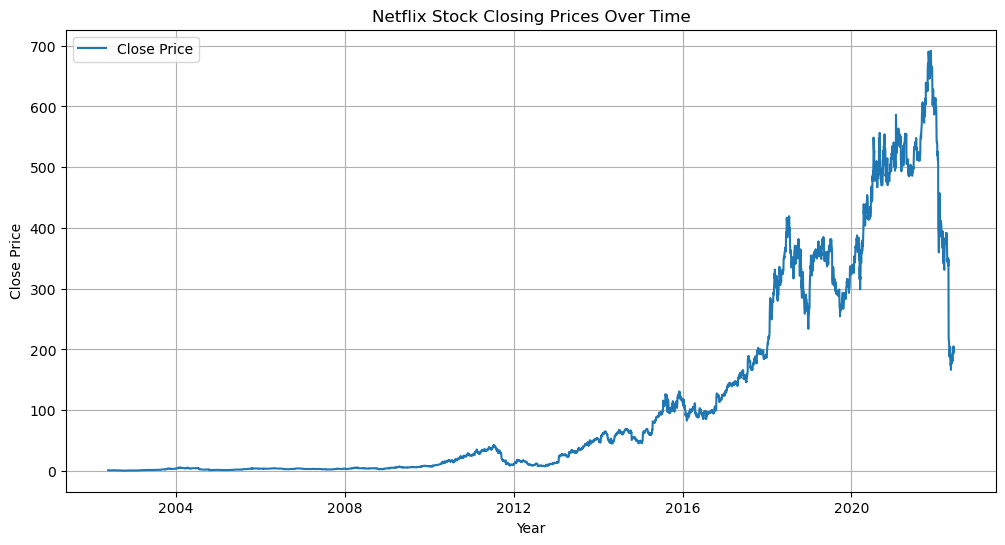

In [219]:
# Trend Analysis: Plotting Closing Prices over time
plt.figure(figsize=(12, 6))
plt.plot(netflix_stock_data['Close'], label='Close Price')
plt.title('Netflix Stock Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

The above plot indicates that the stock price was relatively stable and low for the initial years following the IPO. Starting around 2013, there's a noticeable upward trend, with the price increasing significantly until it reaches a peak. After this peak, there is a sharp decline visible at the end of the time series. This is helpful for identifying trends in stock price movements over time and can be a useful tool for investors and analysts to understand the historical performance of a stock.

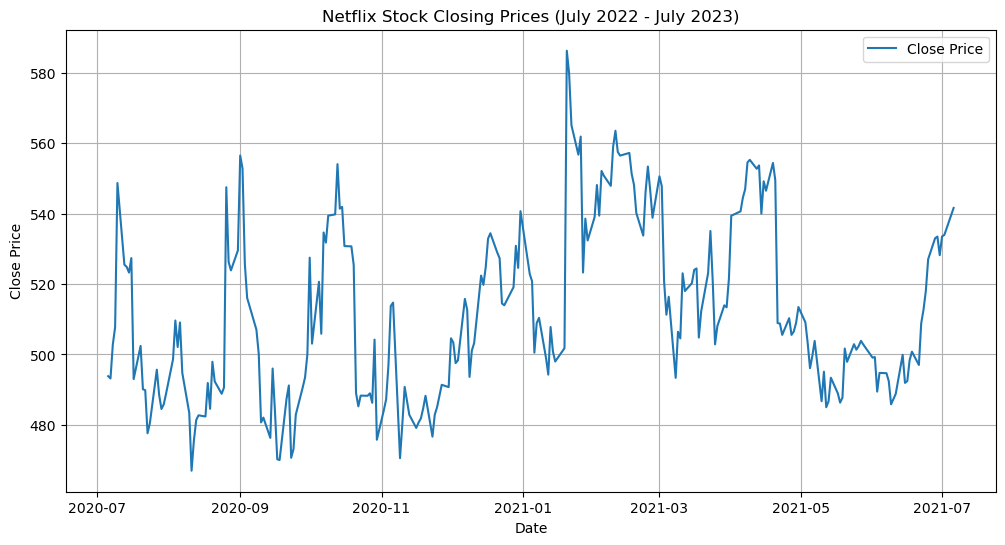

In [220]:
# Seasonality Check: Plotting a year's worth of data to observe potential seasonality
plt.figure(figsize=(12, 6))
one_year_data = netflix_stock_data['Close'].loc['2020-07-06':'2021-07-06']
plt.plot(one_year_data, label='Close Price')
plt.title('Netflix Stock Closing Prices (July 2022 - July 2023)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

The above graph is intended to check for potential seasonality in the stock's performance, with the x-axis labeled 'Date' and the y-axis labeled 'Close Price'. The graph displays fluctuations in the stock price over the course of the year, with some significant peaks and troughs. These patterns could suggest periods of higher and lower stock prices, which might be attributed to seasonal factors, market events, company performance updates, or broader economic conditions.

/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


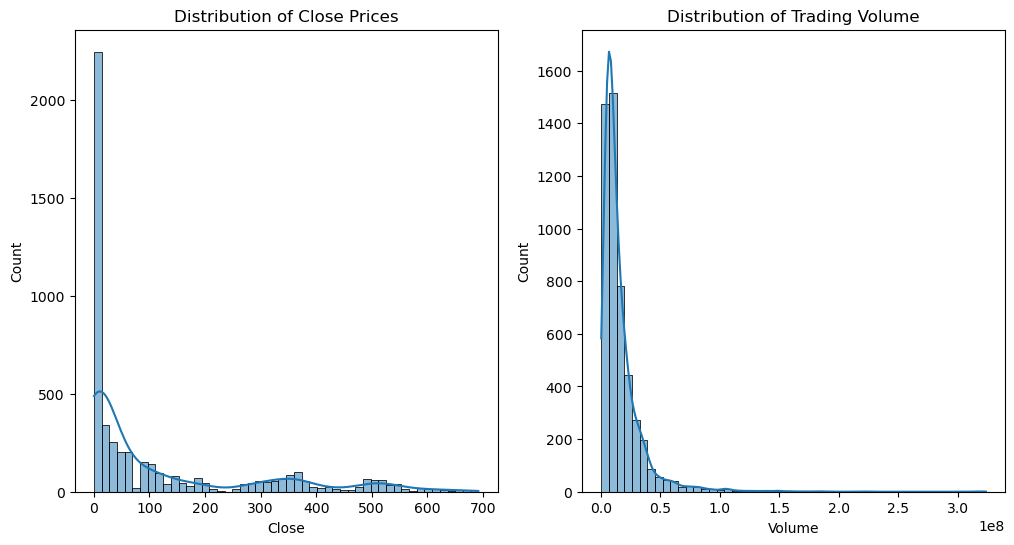

In [221]:
# Distribution Analysis: Histograms for Close Price and Volume
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(netflix_stock_data['Close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')

plt.subplot(1, 2, 2)
sns.histplot(netflix_stock_data['Volume'], bins=50, kde=True)
plt.title('Distribution of Trading Volume')
plt.show()

The Distribution of Close Prices and shows the frequency distribution of the closing prices. It appears to have a right-skewed distribution, indicating that higher closing prices are less frequent.The Distribution of Trading Volume  illustrates how often different volumes of the stock were traded. This graph also appears to be right-skewed, suggesting that days with very high trading volumes are less common compared to days with moderate or low volumes.

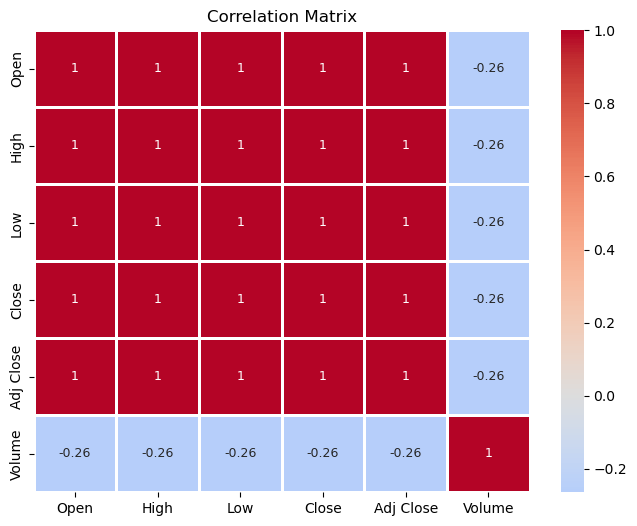

In [222]:
# Correlation Analysis
correlation_matrix = netflix_stock_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,center=0,linewidths=0.8, annot=True, cmap='coolwarm',annot_kws={"size": 9})
plt.title('Correlation Matrix')
plt.show()

The heatmap shows a high positive correlation of 1 between the 'Open', 'High', 'Low', 'Close', and 'Adj Close' variables, which is expected as these prices typically move together during the trading day. The 'Volume' variable, however, shows a slight negative correlation with these price variables, indicated by a light blue color with a correlation coefficient of approximately -0.26. This could suggest that on days when the price is higher, the volume might be slightly lower, or vice versa, though the correlation is weak.

In [223]:
# Preprocessing the stock data
scaler = StandardScaler()
netflix_stock_data['Scaled_Close'] = scaler.fit_transform(netflix_stock_data[['Close']])

In [224]:
# For the purpose of this example, we will create a dummy sentiment score
netflix_stock_data['Sentiment_Score'] = 1  

# If the stock price increased from the previous day, we label it as 1, otherwise 0
netflix_stock_data['Target'] = (netflix_stock_data['Close'].shift(-1) > netflix_stock_data['Close']).astype(int)

In [225]:
# Drop the last row as it will not have a target value
netflix_stock_data = netflix_stock_data[:-1]

# Model Training

Using Logistic regression

In [226]:
# Define features and target
X = netflix_stock_data[['Scaled_Close', 'Sentiment_Score']]
y = netflix_stock_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

# Results

In [227]:
# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

# Sample predictions
print(f"Sample Predictions: {y_pred[:5]}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       493
           1       0.51      1.00      0.68       516

    accuracy                           0.51      1009
   macro avg       0.26      0.50      0.34      1009
weighted avg       0.26      0.51      0.35      1009

Model Accuracy: 0.5113974231912785
Sample Predictions: [1 1 1 1 1]


/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above, we can analyze that  the accuracy of the logistic regression model of netflix dataset is 51% but this metric can be misleading in the context of imbalanced datasets. From the above resuts, 0 indicates that there is an expected decrease in the stock price and 1 indicates a increase. precison of 1 is 0.51 which indicates that the model will predict corectly the increase in stock prices but as precision of 0 is 0 it wont predict the decrease or constat correctly. recall is 1 for 1 which indicates that the model correctly identified all class 1 instances.

# Dataset2

#2 Worked Example 

#**Problem:  Predicting the direction of the stock price movement (up or down) based on a combination of historical stock prices and sentiment analysis of Amazon, using logistic regression?**


Input and Output Format

Inputs:
Historical stock prices of Amazon for the past 'N' days. The data includes Open, High, Low, Close, and Volume for each day.

Outputs:
A binary indicator for each day in the prediction set, where '1' indicates an expected increase (or no change) in the closing price the following day, and '0' indicates an expected decrease.

  The task is to build a machine learning model that can accurately predict the direction of the stock price movement based on the given features.

**Input Format:**
- A CSV file containing historical stock price data with the following columns:
The dataset contains historical stock data for Amazon from March 28, 2016, to March 26, 2021. It includes 1260 entries, each with seven columns: 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'. These columns detail the stock's daily trading activity, such as the opening price, highest and lowest price, closing price, adjusted closing price, and the volume of shares traded. The dataset provides a comprehensive overview of Amazon's stock performance over a five-year period, offering insights into market trends and the company's financial health during this timeframe

**Output Format:**
- A  model that can predict whether the stock prices are rising or declining.

**Sample Inputs and Outputs:**

Input:
- A dataset containing  data.

Output:
- A  model (e.g., Logistic Regression, Random Forest, or any other suitable algorithm).

**Constraints:**
- The dataset may contain missing values, and these need to be handled appropriately.
- The dataset may have class imbalance, so appropriate techniques for handling imbalanced data should be used.
- Accuracy, precision, recall, and F1-score should be considered as evaluation metrics for the model.
- The model should be scalable and capable of handling large datasets efficiently.



**Proof of Correctness:**

- The correctness of the solution can be validated by assessing the model's performance on a held-out test dataset. Metrics such as accuracy, precision, recall, and F1-score will be used to determine the model's effectiveness in detecting fraudulent transactions.


**Goal -**

The goal of stock price prediction models is to the direction of the stock price movement (up or down) based on a combination of historical stock prices and sentiment analysis of NAmazon.

Logistic regression can be used to predict the direction of the stock price movement. A binary indicator for each day in the prediction set, where '1' indicates an expected increase (or no change) in the closing price the following day, and '0' indicates an expected decrease.

Model adequacy and robustness checks are performed to ensure that the model is being properly
fitted and interpreted.

# Data Profiling

In [228]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/users/akankshanakati/downloads/Amazon_Historical_StockPrice2.csv'
amazon_stock_data = pd.read_csv(file_path)

In [229]:
# Display the first few rows of the dataset to understand its structure
amazon_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,584.400024,584.750000,575.559998,579.869995,579.869995,3121500
1,2016-03-29,580.150024,595.849976,576.500000,593.859985,593.859985,4392600
2,2016-03-30,596.710022,603.239990,595.000000,598.690002,598.690002,3890500
3,2016-03-31,599.280029,600.750000,592.210022,593.640015,593.640015,2681800
4,2016-04-01,590.489990,599.030029,588.299988,598.500000,598.500000,2917400


In [230]:
# Descriptive Statistics
descriptive_stats = amazon_stock_data.describe()
descriptive_stats

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,1677.254199,1694.635633,1657.249580,1676.504673,1676.504673,4.318210e+06
std,787.593224,798.250932,774.769809,786.149289,786.149289,2.089566e+06
min,580.150024,584.750000,575.559998,579.869995,579.869995,8.813000e+05
25%,967.990005,974.467499,959.544983,966.027512,966.027512,2.908675e+06
50%,1676.494995,1698.104980,1654.445007,1671.174988,1671.174988,3.716250e+06
75%,1932.977478,1951.877502,1908.004974,1928.965027,1928.965027,5.122475e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,1.656500e+07


# Data Cleaning

In [231]:
# Data Quality Check
missing_values = amazon_stock_data.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in this dataset.

In [232]:
# Time Series Analysis

In [233]:
# Time Range Analysis
time_range = amazon_stock_data['Date'].agg(['min', 'max'])
time_range

min    2016-03-28
max    2021-03-26
Name: Date, dtype: object

In [234]:
# Converting 'Date' from string to datetime
amazon_stock_data['Date'] = pd.to_datetime(amazon_stock_data['Date'])

# Setting 'Date' as the index of the dataframe for time series analysis
amazon_stock_data.set_index('Date', inplace=True)

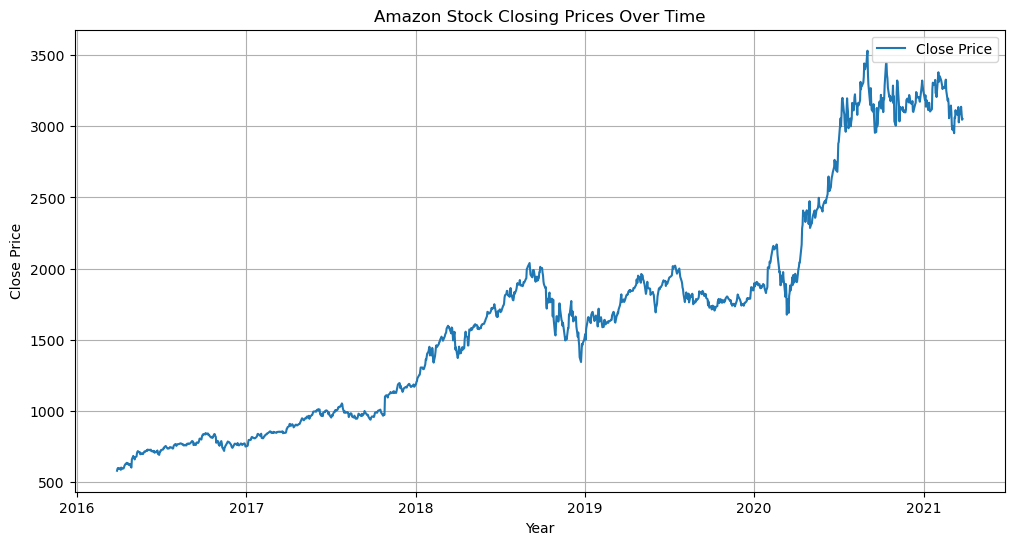

In [235]:
# Trend Analysis: Plotting Closing Prices over time
plt.figure(figsize=(12, 6))
plt.plot(amazon_stock_data['Close'], label='Close Price')
plt.title('Amazon Stock Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

From the above plot, we can observe that the stock price was relatively lower in 2016 and has experienced periods of growth and retracement, with an overall upward trajectory until what appears to be a peak followed by some volatility towards the end of the visible data.

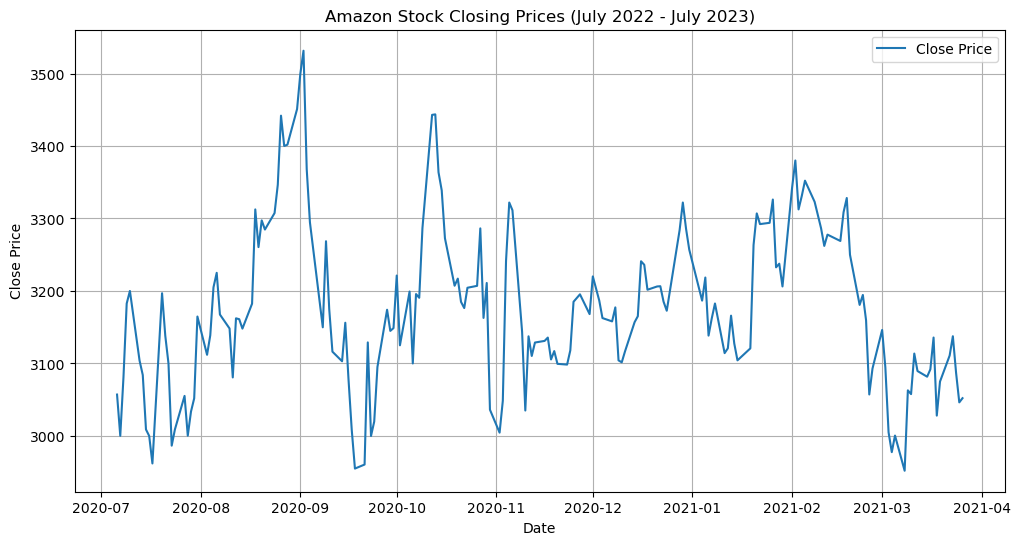

In [236]:
# Seasonality Check: Plotting a year's worth of data to observe potential seasonality
plt.figure(figsize=(12, 6))
one_year_data = amazon_stock_data['Close'].loc['2020-07-06':'2021-07-06']
plt.plot(one_year_data, label='Close Price')
plt.title('Amazon Stock Closing Prices (July 2022 - July 2023)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

The above plot shows significant volatility in the stock price, with noticeable fluctuations within the time frame.

/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


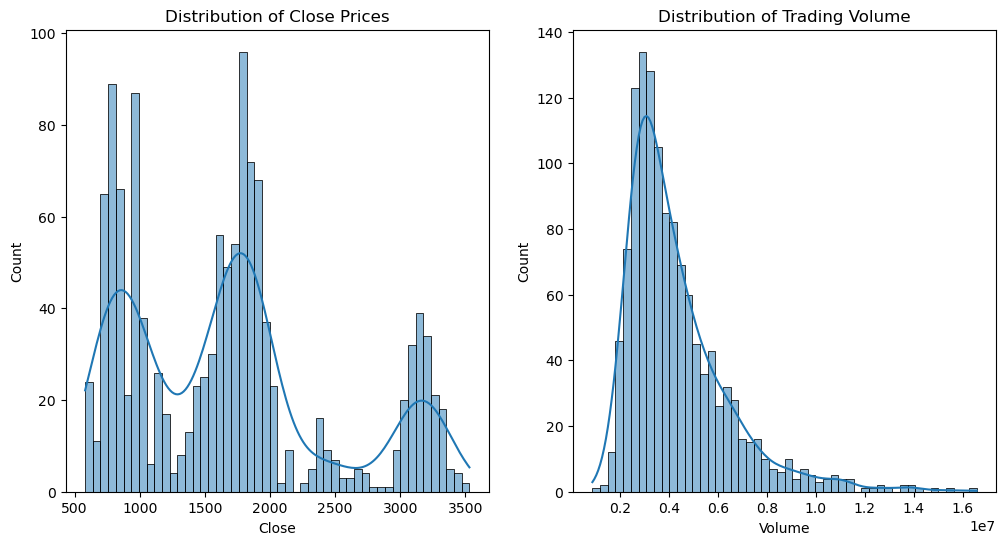

In [237]:
# Distribution Analysis: Histograms for Close Price and Volume
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(amazon_stock_data['Close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')

plt.subplot(1, 2, 2)
sns.histplot(amazon_stock_data['Volume'], bins=50, kde=True)
plt.title('Distribution of Trading Volume')
plt.show()

The Distribution of Close Prices suggests a multimodal distribution for the closing prices, with several peaks visible. This could indicate that the stock has frequently closed at several different price levels over the time period covered by the data. The Distribution of Trading Volume histogram  shows the distribution of trading volume, with a right-skewed pattern. This means that there are many days with relatively low trading volumes and fewer days with very high trading volumes.

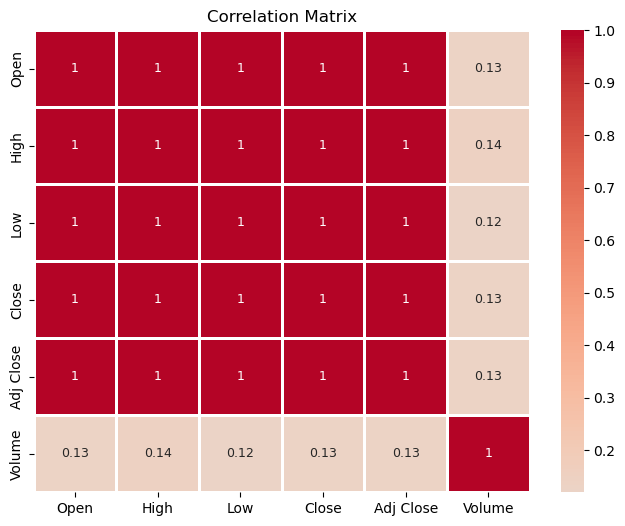

In [238]:
# Correlation Analysis
correlation_matrix = amazon_stock_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,center=0,linewidths=0.8, annot=True, cmap='coolwarm',annot_kws={"size": 9})
plt.title('Correlation Matrix')
plt.show()

The above correlation matrix shows 'Open', 'High', 'Low', 'Close', and 'Adj Close' variables have a perfect positive correlation with each other (correlation coefficient of 1), which is typical for stock market data as these variables are often closely related. The 'Volume' variable has a very weak positive correlation with the 'Open', 'High', 'Low', 'Close', and 'Adj Close' variables, with coefficients ranging approximately from 0.12 to 0.14. This suggests that there is a negligible direct relationship between the trading volume and the stock prices for this particular dataset. The color gradient goes from dark red for a correlation of 1 to white for correlations near 0, indicating no correlation.

In [239]:
# Preprocessing the stock data
scaler = StandardScaler()
amazon_stock_data['Scaled_Close'] = scaler.fit_transform(amazon_stock_data[['Close']])

In [240]:
# Adding a dummy sentiment score
amazon_stock_data['Sentiment_Score'] = 1

# Creating a target variable for stock price movement
amazon_stock_data['Target'] = (amazon_stock_data['Close'].shift(-1) > amazon_stock_data['Close']).astype(int)


In [241]:
# Drop the last row as it will not have a target value
amazon_stock_data = amazon_stock_data[:-1]


# Model Training

Using Logistic regression

In [242]:
# Define features and target
X1 = amazon_stock_data[['Scaled_Close', 'Sentiment_Score']]
y1 = amazon_stock_data['Target']

# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X1_train, y1_train)

LogisticRegression()

In [243]:
# Make predictions
y1_pred = logistic_model.predict(X1_test)

# Evaluate the model
print(classification_report(y1_test, y1_pred))
print(f"Model Accuracy: {accuracy_score(y1_test, y1_pred)}")

# Sample predictions
print(f"Sample Predictions: {y1_pred[:5]}")

              precision    recall  f1-score   support

           0       0.32      0.13      0.18        94
           1       0.62      0.84      0.71       158

    accuracy                           0.58       252
   macro avg       0.47      0.48      0.45       252
weighted avg       0.51      0.58      0.52       252

Model Accuracy: 0.5753968253968254
Sample Predictions: [1 1 1 1 1]


From the above, we can analyze that  the accuracy of the logistic regression model of amazon dataset is 57% but this metric can be misleading in the context of imbalanced datasets. From the above resuts, 0 indicates that there is an expected decrease in the stock price and 1 indicates a increase. precison of 1 is 0.62 which indicates that the model will predict corectly the increase in stock prices but as precision of 0 is 0.32 it will slightly predict the decrease or constat correctly. recall is 0.84 for 1 which indicates that the model almost correctly identified all class 1 instances.

# Conclusion
 
 We have delved into stock market data for Netflix and Amazon, utilizing a range of analytical techniques. We assessed long-term price movements and probed for cyclical behavior in the stocks' daily closing values. The analyses demonstrated notable growth trends for both companies, with varied price stability and occasional volatility. Examination of the trading volumes and price distributions highlighted predominantly lower volume days and a diversity of closing price points. Correlation heatmaps expected positive relationships among standard trading indicators while revealing minimal influence of trading volumes on price changes. These insights lay the groundwork for advanced predictive analytics and risk modeling, although it is recognized that stock market forecasting is multifaceted and historical trends are but one piece in the complex puzzle of investment decision-making. 

 # References

1. Amazon Dataset: https://www.kaggle.com/datasets/specter7/amazon-amzn-historical-stock-price-data 
2. Netflix Dataset: https://www.kaggle.com/datasets/meetnagadia/netflix-stock-price-data-set-20022022
3. Owner - AI Skunkworks Link: https://github.com/aiskunks/Skunks_Skool
4. The Ultimate Guide to Time-Series Analysis: https://www.timescale.com/blog/what-is-time-series-analysis-with-examples-and-applications/
5. Predicting Stock Prices with LSTM and GRU: https://blog.gopenai.com/predicting-stock-prices-with-lstm-and-gru-a-step-by-step-guide-381ec1554edf
6. Code Reference: https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/tree/main/Understanding_Data

# License

## Copyright 2024 Akanksha Nakati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.